#### Loan Approval Classification Problem

#### Loading Dataset


In [2]:
import numpy as np        # Used for math operations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')  


In [3]:
# Load the training set
train_data = pd.read_csv("train_data.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#LOad the test set
test_data = pd.read_csv("test_data.csv")
test_data.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
#Check at the dataset size
print("Train dataset shape:", train_data.shape)
print("Test dataset shape:", test_data.shape)

Train dataset shape: (614, 13)
Test dataset shape: (367, 12)


##### For Data Consistency, I'll be creating a copy of the dataset


In [6]:
train_data_clean = train_data.copy()
test_data_clean = test_data.copy()

##### **Exploratory Data Analysis**

 - Check for data consistency
  This includes checking for missing values in the training set and the testing set

In [7]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- **NB: - We have 12 independent  variables and the **Loan_Status** which is the target variable**
>> 
- From the training set it is evident that there are missing values
- To address the issue of missing value we need to know how many values are missing in every column
- The above allows us to see that we have categorical values - object values
- Continous values exist in two formats: integer values and float values

NB: The three data types are ------------> dtypes: float64(4), int64(1), object(8)


In [8]:
# Calculate the individual values missing from the columns in the training set
train_missing = train_data_clean.isnull().sum()
print("Sum of values missing in every column of the training set", train_missing)

Sum of values missing in every column of the training set Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


- The columns **'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'** have missing values
- - To handle missing values, I'll replace them with the mode (most frequent) for categorical variables and with the mean (average) for numerical variables



In [9]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
# Calculate the individual values missing from the columns in the testing set
test_missing = test_data_clean.isnull().sum()
print("Sum of values missing in every column of the testing set", test_missing)


Sum of values missing in every column of the testing set Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


- The columns **'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount', 'Credit_History'** have missing values 


#### Next step should be to check at how the Statistical Summary of the training set since that is the set that will be using for model 


In [11]:
train_data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


- From the above we can only see the statistical summary of the columns that have continous values

##### **Univariate Analysis**

-> Univariate analysis is a statistical method that involves analyzing one variable at a time. It helps us understand the characteristics and patterns of individual variables without considering the relationship with other variables.

*** CATEGORICAL VARIABLES ***
-> Performing univariate analysis for categorical variables involves analyzing and summarizing the distribution of categories within a single variable. Here are some common methods used for univariate analysis of categorical variables:

 - **Frequency Distribution:**  Calculate the frequency of each category in the dataset. This helps in understanding how often each category appears in the data.
 - **Bar Charts:** Create a bar chart to visually represent the frequency distribution of categories. The height of each bar corresponds to the frequency of that catego   ry, making it easy to compare different categories.

 - **Pie Charts:** Use a pie chart to show the proportion of each category relative to the whole. Each category is represented as a slice of the pie, with the size of the slice indicating its relative frequency.

 - **Mode:** Identify the mode, which is the category that appears most frequently in the dataset. This provides insight into the most common category in the data.
 - **Percentage Distribution:** Calculate the percentage of each category relative to the total number of observations. This helps in understanding the relative importa**nce of each category.

 - **Cross-tabulation:** Create a cross-tabulation or contingency table to show the relationship between two categorical variables. This can help in identifying patterns and associations between different categories.



*** NUMERICAL VARIABLES ***

Performing univariate analysis for numerical variables involves analyzing and summarizing the distribution and characteristics of a single numerical variable. Here are some common methods used for univariate analysis of numerical variables:

**Measures of Central Tendency:**
- Mean: Calculate the average value of the numerical variable.
- Median: Find the middle value of the variable when all values are arranged in ascending order.
- Mode: Identify the most frequently occurring value in the variable.

**Measures of Dispersion:**
- Range: Calculate the difference between the maximum and minimum values of the variable.
- Variance: Measure how spread out the values are from the mean.
- Standard Deviation: Determine the average distance of data points from the mean.

**Histogram:**
- Create a histogram to visualize the distribution of the numerical variable. It shows the frequency of values within different intervals or bins.

**Box Plot:**
- Construct a box plot to display the distribution of the numerical variable, including the median, quartiles, and outliers.

**Skewness and Kurtosis:**
- Skewness: Measure the asymmetry of the distribution. A skewness value of 0 indicates a symmetrical distribution.
- Kurtosis: Assess the peakedness or flatness of the distribution. A kurtosis value of 3 indicates a normal distribution.

**Descriptive Statistics:**
- Calculate additional descriptive statistics such as sum, count, standard error, confidence intervals, and percentiles to gain a comprehensive understanding of the numerical variable.





In [12]:
# Categorical variables
categorical_train = train_data_clean.select_dtypes(include='object').columns

print("Below are the categorical variables: \n", categorical_train)

Below are the categorical variables: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [13]:
# Frequency table for Loan_Status
loan_status_freq = train_data_clean['Loan_Status'].value_counts(normalize=True)
print("\nFrequency table for Loan_Status:\n", loan_status_freq)


Frequency table for Loan_Status:
 Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


**Key Take Away Points:**

- **.value_counts(normalize=True)** Get the frequency and the result is in form of proportion
- **.value_count** Get the frequency and the result is given as the number of values(frequency)

**NB:** What we can deduce is that **0.687296**  and equivant of 422 of the loans applied were approved while  **0.312704** of the loans disapproved

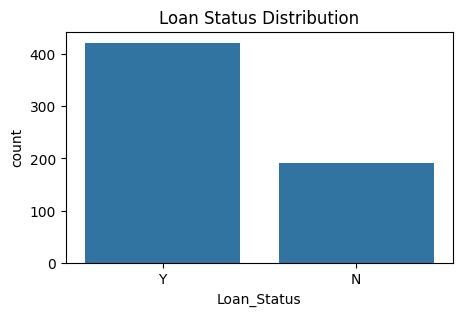

In [14]:
# Start with the target categorical variables - Loan_Status
plt.figure(figsize=(5, 3))
sns.countplot(x='Loan_Status', data=train_data_clean)
plt.title("Loan Status Distribution")
plt.show()



In [15]:
# Categorical variables
categorical_train = train_data_clean.select_dtypes(include='object').columns

print("Below are the categorical variables: \n", categorical_train)

Below are the categorical variables: 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


##### **Subplots of the categorical variables** 

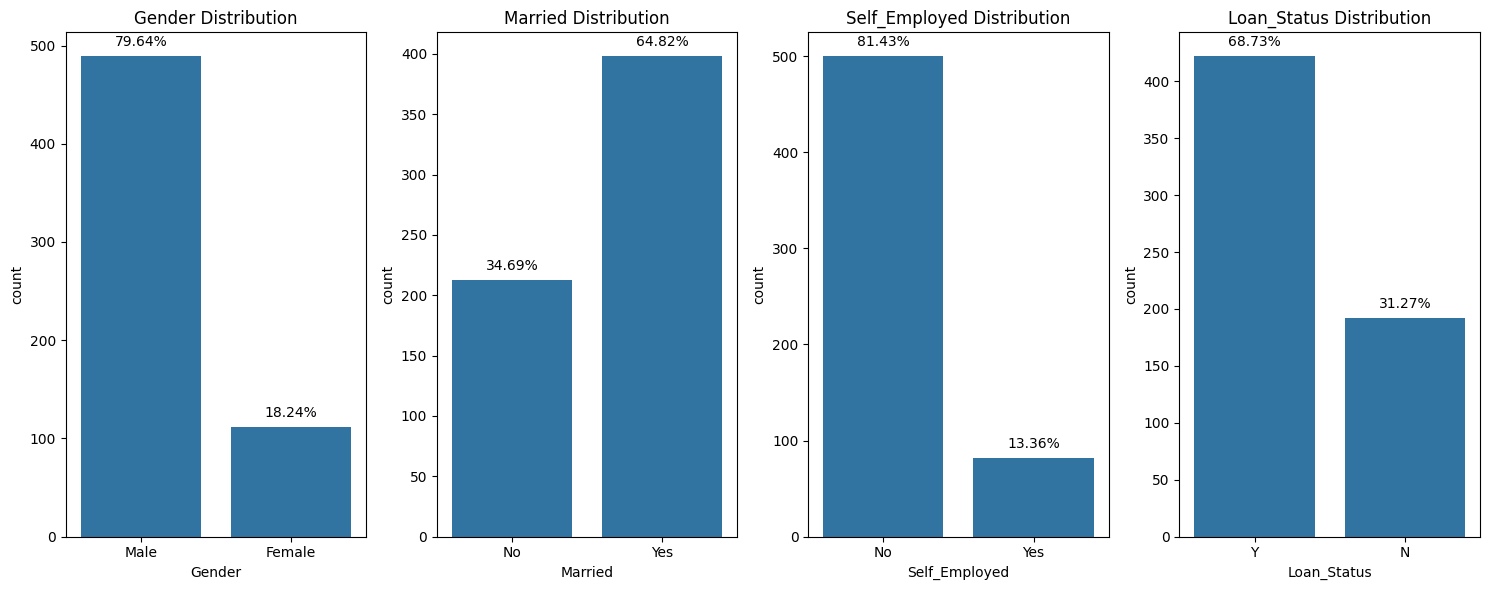

In [16]:
"""
This code snippet creates subplots to display the distribution of specified columns from the 'train_data_clean' DataFrame using matplotlib and seaborn.

Parameters:
- train_data_clean (DataFrame): The DataFrame containing the data to be visualized.

Steps:
1. Specify the columns to display in the 'columns_to_display' list.
2. Create subplots using plt.subplots(2, 4, figsize=(20, 10)) to arrange the plots in a 2x4 grid.
3. Flatten the axes array for easy iteration.
4. Plot each column in a separate subplot using sns.countplot.
5. Set the title for each subplot based on the column name.
6. Adjust the layout of the subplots using plt.tight_layout().
7. Display the subplots using plt.show().

Returns:
- Subplots displaying the distribution of the specified columns from the 'train_data_clean' DataFrame.

Note:
- The code assumes that 'train_data_clean' is a pandas DataFrame containing the data to be visualized.
- The 'columns_to_display' list should contain the names of the columns to be displayed in the subplots.
- Make sure to have matplotlib and seaborn libraries imported before running the code.
"""



# Specify the columns to display
columns_to_display = ['Gender', 'Married',  'Self_Employed', 'Loan_Status']

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_display):
    sns.countplot(x=col, data=train_data_clean, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    
    # Add count values at the bottom of each bar
    # Add percentage values at the bottom of each bar
    total = float(len(train_data_clean[col]))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Adjust layout
plt.tight_layout()
plt.show()

##### **OBSERVATION ON LOAN APPLICATION DISTRIBUTION FOR CATEGORICAL VARIABLES**

##### Gender Distribution

- **Male (489)**: The bar chart indicates that a significant majority of the loan applicants are male. This suggests that males are more likely to apply for loans in this dataset.
- **Female (112)**: A smaller proportion of the applicants are female. This discrepancy might point towards potential socio-economic factors, cultural norms, or preferences influencing the lower number of female applicants.

##### Married Distribution

- **No (213)**: A smaller group of the applicants are not married. This could include single, divorced, or widowed individuals.
- **Yes (398)**: The majority of the applicants are married. This might imply that married individuals are more likely to apply for loans, possibly due to combined household income, financial planning for families, or joint financial responsibilities.

##### Dependents Distribution

- **0 (345)**: Most applicants do not have dependents. This might indicate a preference or higher likelihood of single or childless individuals applying for loans.
- **1 (102)**: A significant number of applicants have one dependent, which might reflect young families or individuals with single child responsibilities.
- **2 (101)**: A similar number of applicants have two dependents, reflecting families with more children.
- **3+ (51)**: Fewer applicants have three or more dependents, possibly due to higher financial burdens or fewer financial resources available for loan repayment in larger families.

##### Education Distribution

- **Graduate (480)**: A large majority of the applicants are graduates. This could imply that higher education levels are associated with higher chances of applying for loans, possibly due to better job prospects and higher incomes.
- **Not Graduate (134)**: A smaller group did not graduate. This could reflect a correlation between education levels and financial stability or confidence in managing loan repayments.

##### Self_Employed Distribution

- **No (500)**: Most applicants are not self-employed. This suggests that salaried individuals, with presumably stable and predictable incomes, are more likely to apply for loans.
- **Yes (82)**: A smaller number of applicants are self-employed. This might reflect the variability in income among self-employed individuals, making them less likely to apply for loans or meet the lending criteria.

##### Property_Area Distribution

- **Urban (202)**: A substantial number of applicants come from urban areas, where economic activities and opportunities might be higher, leading to more loan applications.
- **Rural (179)**: Applicants from rural areas are slightly fewer, possibly reflecting lower economic activity or access to financial services.
- **Semiurban (233)**: The highest number of applicants are from semiurban areas, which might represent a mix of both urban and rural characteristics, leading to a balanced economic activity and loan application behavior.

##### Loan_Status Distribution

- **Y (Yes) (422)**: Most loan applications have been approved, indicating that a significant proportion of the applicants meet the lending criteria.
- **N (No) (192)**: A smaller proportion of loan applications have been rejected. This might reflect the strictness of lending criteria or the applicants' inability to meet certain financial metrics required for loan approval.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **Subplots on Independent Ordinal Variables**
- Ordinal values tend to follow a natural convention eg High to Low.
- For instance in the case of education, you can highlight the ranking from undergraduate to Masters or PHD

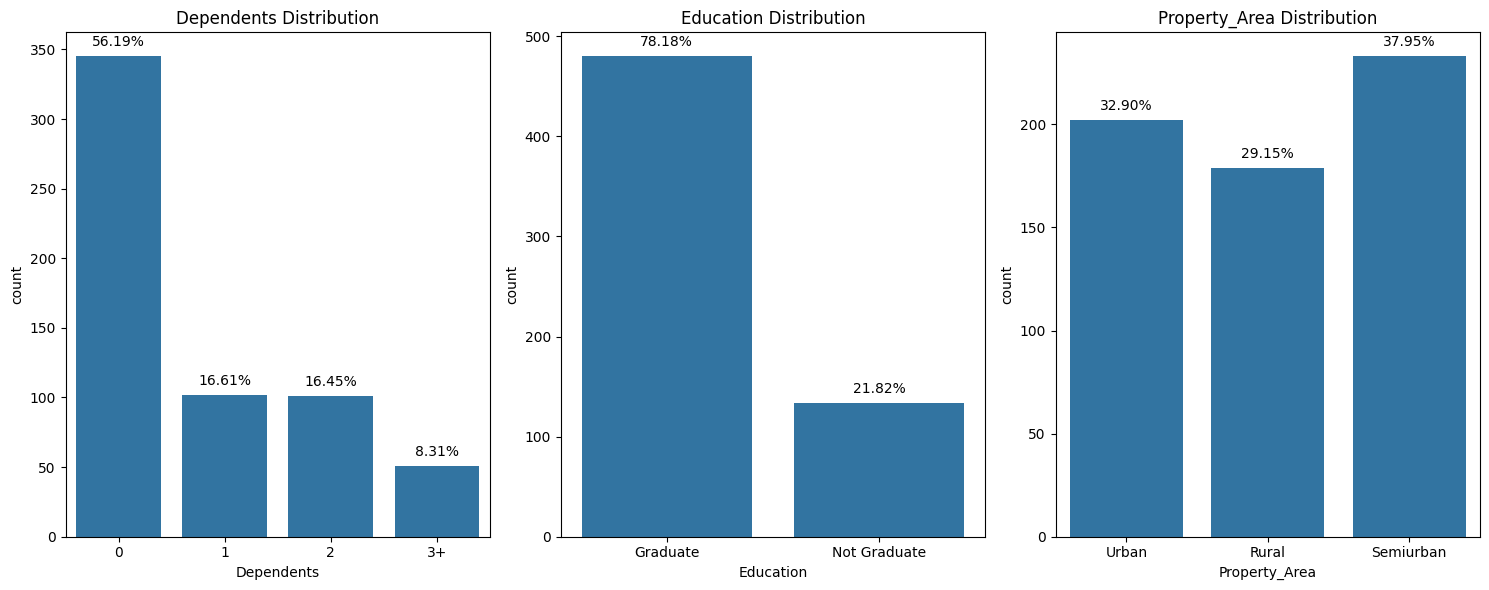

In [17]:
# Specify the columns to display
columns_to_display = ['Dependents', 'Education','Property_Area']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_display):
    sns.countplot(x=col, data=train_data_clean, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    
    # Add count values at the bottom of each bar
    # Add percentage values at the bottom of each bar
    total = float(len(train_data_clean[col]))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Adjust layout
plt.tight_layout()
plt.show()  

##### **OBSERVATION ON LOAN APPLICATION DISTRIBUTION FOR ORDINAL VARIABLES**


##### Dependents Distribution

- **0 (345)**: Most applicants do not have dependents. This might indicate a preference or higher likelihood of single or childless individuals applying for loans.
- **1 (102)**: A significant number of applicants have one dependent, which might reflect young families or individuals with single child responsibilities.
- **2 (101)**: A similar number of applicants have two dependents, reflecting families with more children.
- **3+ (51)**: Fewer applicants have three or more dependents, possibly due to higher financial burdens or fewer financial resources available for loan repayment in larger families.

##### Education Distribution

- **Graduate (480)**: A large majority of the applicants are graduates. This could imply that higher education levels are associated with higher chances of applying for loans, possibly due to better job prospects and higher incomes.
- **Not Graduate (134)**: A smaller group did not graduate. This could reflect a correlation between education levels and financial stability or confidence in managing loan repayments.


##### Property_Area Distribution

- **Urban (202)**: A substantial number of applicants come from urban areas, where economic activities and opportunities might be higher, leading to more loan applications.
- **Rural (179)**: Applicants from rural areas are slightly fewer, possibly reflecting lower economic activity or access to financial services.
- **Semiurban (233)**: The highest number of applicants are from semiurban areas, which might represent a mix of both urban and rural characteristics, leading to a balanced economic activity and loan application behavior.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------

##### **Subplots of the Numerical variables** 
- We can use a Histogram for the Numerical variables
- Second option is to use a Boxplot

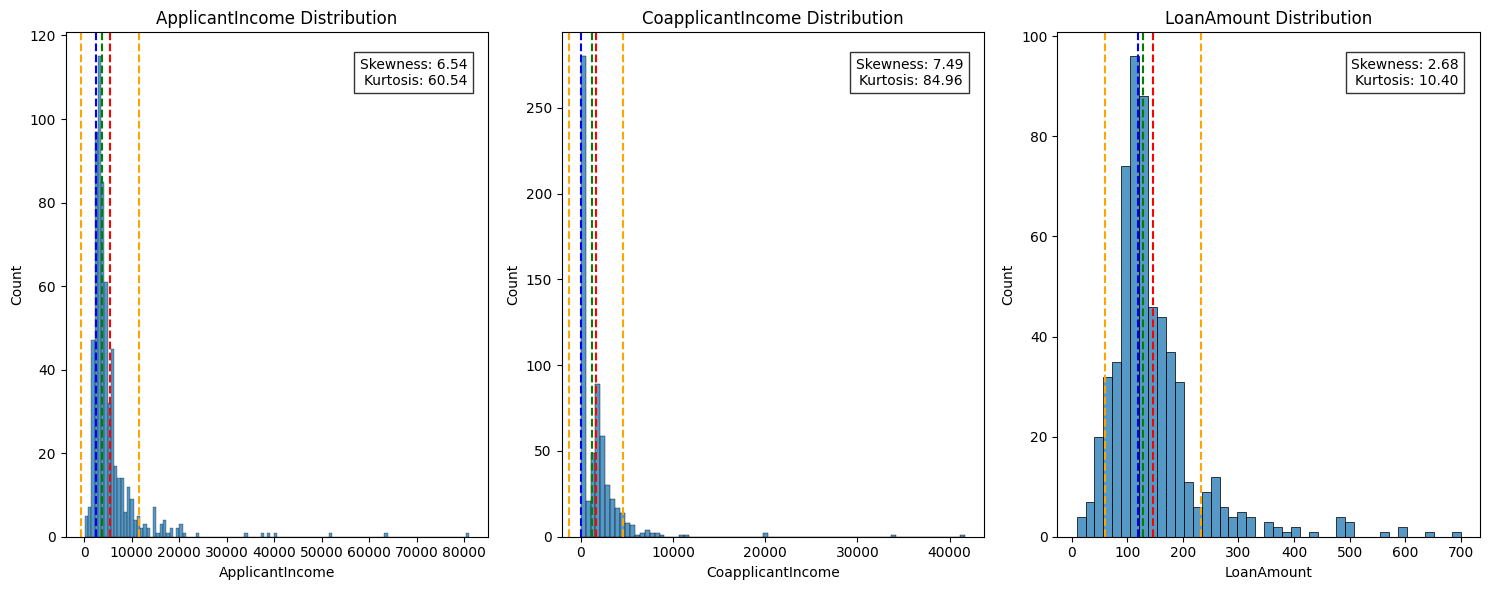

In [18]:
# Histogram

columns_to_display = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()
for i, col in enumerate(columns_to_display):
    sns.histplot(data=train_data_clean, x=col, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

    # Add mean line
    axes[i].axvline(train_data_clean[col].mean(), color='red', ls='--')

    # Add median line
    axes[i].axvline(train_data_clean[col].median(), color='green', ls='--')

    # Add mode line
    mode = train_data_clean[col].mode().values[0]
    axes[i].axvline(mode, color='blue', ls='--')

    # Add standard deviation line
    std_dev = train_data_clean[col].std()
    axes[i].axvline(train_data_clean[col].mean() + std_dev, color='orange', ls='--')
    axes[i].axvline(train_data_clean[col].mean() - std_dev, color='orange', ls='--')
    6
    # Add skewness and kurtosis
    skewness = train_data_clean[col].skew()
    kurtosis = train_data_clean[col].kurtosis()
    axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', transform=axes[i].transAxes, ha='right', va='top', bbox={'facecolor':'white', 'alpha':0.8})


plt.tight_layout()
plt.show()

##### **OBSERVATION ON INDEPENDENT NUMERICAL VARIABLES**

##### ApplicantIncome Distribution
- **Histogram**: The majority of applicant incomes are clustered towards the lower end of the distribution, with a long tail extending towards higher incomes.
- **Skewness (6.54)**: This high positive skewness indicates a right-skewed distribution, where most applicants have lower incomes, and a few applicants have significantly higher incomes.
- **Kurtosis (60.54)**: The high kurtosis value suggests that the distribution has heavy tails and a sharp peak, indicating that most values are near the mean, but there are significant outliers.

##### CoapplicantIncome Distribution
- **Histogram**: Similar to the applicant income, coapplicant incomes are mostly concentrated at the lower end, with very few higher incomes.
- **Skewness (7.49)**: The positive skewness shows a right-skewed distribution, suggesting that most coapplicants have lower incomes, and a few have much higher incomes.
- **Kurtosis (84.96)**: An even higher kurtosis value than the applicant income indicates an even sharper peak and heavier tails, suggesting the presence of more extreme outliers.

##### LoanAmount Distribution
- **Histogram**: The distribution of loan amounts is more balanced than the income distributions but still shows some right skewness.
- **Skewness (2.68)**: This indicates a slight right skewness, meaning that while most loan amounts are clustered towards the lower end, there are still some higher loan amounts extending the tail to the right.
- **Kurtosis (10.40)**: This value indicates moderate kurtosis, with a peak and tails that are less extreme than the income distributions but still show some level of outliers.

##### Observations
- **Applicant and Coapplicant Incomes**: Both distributions show a significant right skewness and high kurtosis, indicating that while most applicants and coapplicants have relatively low incomes, there are notable outliers with very high incomes. This suggests that the income distribution is not uniform and that higher incomes are much less common.
- **Loan Amounts**: The distribution of loan amounts is less skewed compared to incomes but still shows a tendency towards higher amounts with some outliers. This indicates that while most loans are of moderate size, there are instances of significantly higher loan amounts.

##### Statistical Lines
- **Vertical Lines**: The different vertical lines (mean, median, mode, and standard deviations) on the histograms help to visualize the central tendency and spread of the data.
  - **Mean**: The average value of the distribution.
  - **Median**: The middle value of the distribution.
  - **Mode**: The most frequent value in the distribution.
  - **Standard Deviations**: The lines at one and two standard deviations from the mean help to understand the spread and identify outliers.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

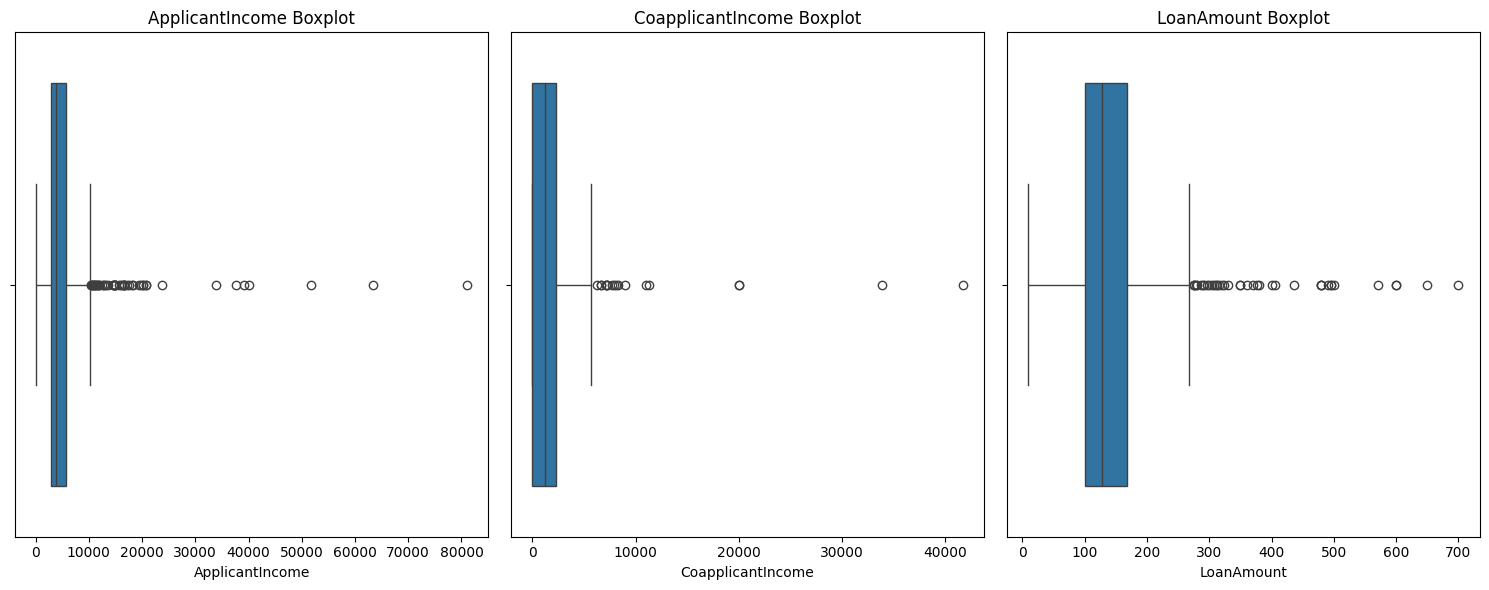

In [19]:
# Specify the columns for boxplots
columns_to_display = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create subplots for boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot boxplots for each column
for i, col in enumerate(columns_to_display):
    sns.boxplot(x=col, data=train_data_clean, ax=axes[i])
    axes[i].set_title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### **BIVARIATE ANALYSIS**

Bivariate analysis is a statistical method that involves the analysis of two variables to determine the relationship between them. It helps in understanding how one variable changes in relation to another variable. This analysis is often used to explore the association, correlation, or causation between two variables in a dataset.

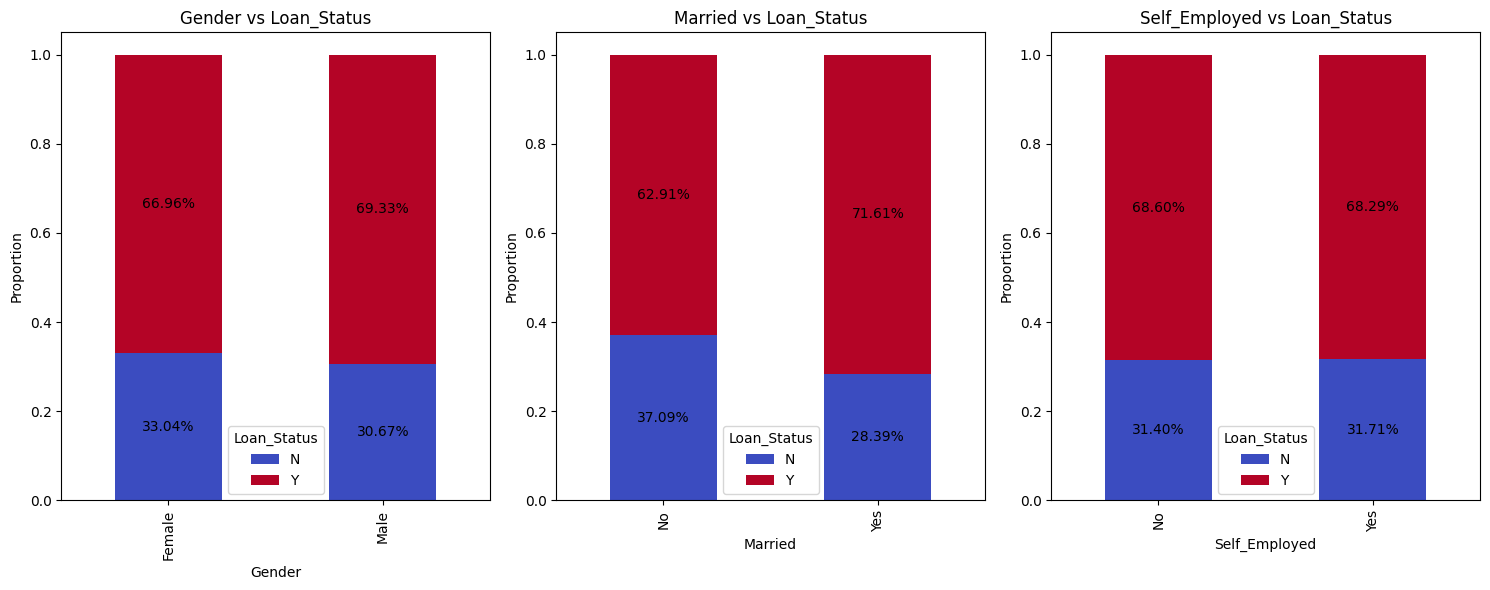

In [26]:
columns_to_display = ['Gender', 'Married',  'Self_Employed']
target_column = 'Loan_Status'

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_display):
    # Create a crosstab of the column and the target variable
    crosstab = pd.crosstab(train_data_clean[col], train_data_clean[target_column], normalize='index')

    # Plot stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f"{col} vs {target_column}")
    axes[i].set_ylabel('Proportion')

    # Add percentage values inside each bar
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2%}', (x + width/2., y + height/2.), ha='center', va='center')

# Adjust layout
plt.tight_layout()
plt.show()


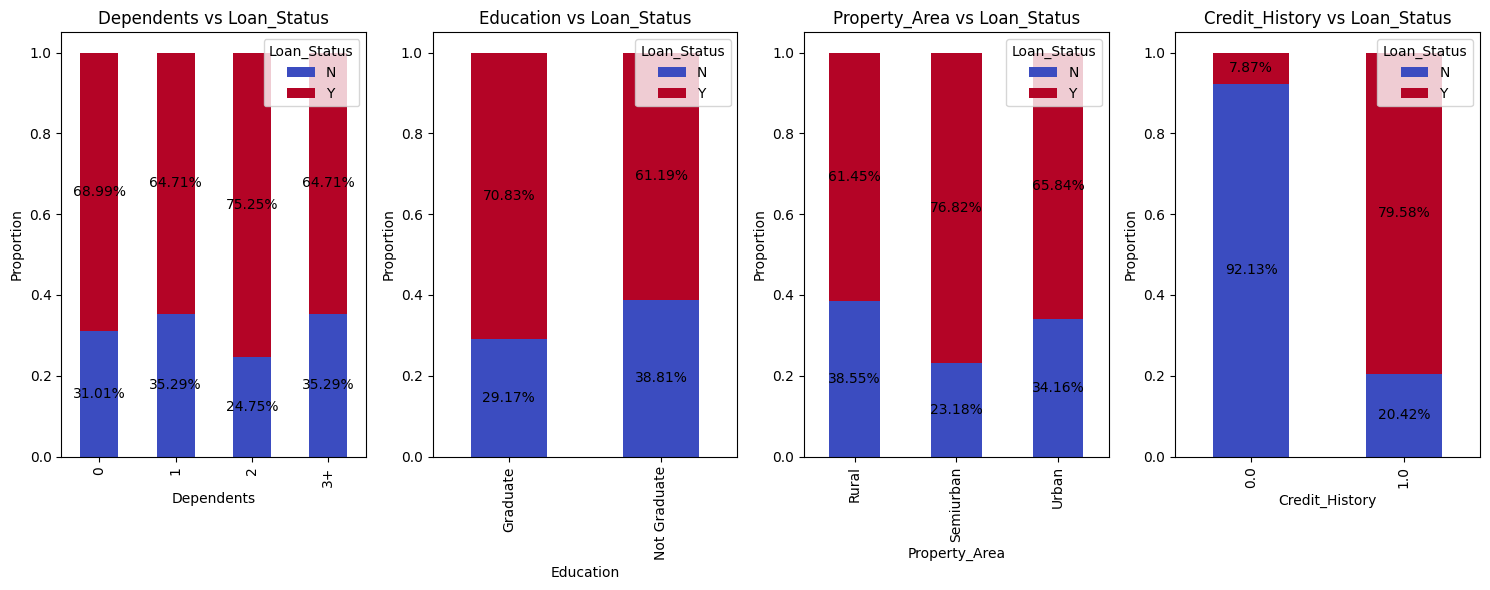

In [27]:
columns_to_display = ['Dependents', 'Education','Property_Area', 'Credit_History']
target_column = 'Loan_Status'

fig, axes = plt.subplots(1, 4, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns_to_display):
    # Create a crosstab of the column and the target variable
    crosstab = pd.crosstab(train_data_clean[col], train_data_clean[target_column], normalize='index')

    # Plot stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f"{col} vs {target_column}")
    axes[i].set_ylabel('Proportion')

    # Add percentage values inside each bar
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2%}', (x + width/2., y + height/2.), ha='center', va='center')

# Adjust layout
plt.tight_layout()
plt.show()


In [33]:
numerical_columns_to_display = train_data_clean.select_dtypes(include=['float','int']).columns
print("numerical_columns_to_display", numerical_columns_to_display)

numerical_columns_to_display Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


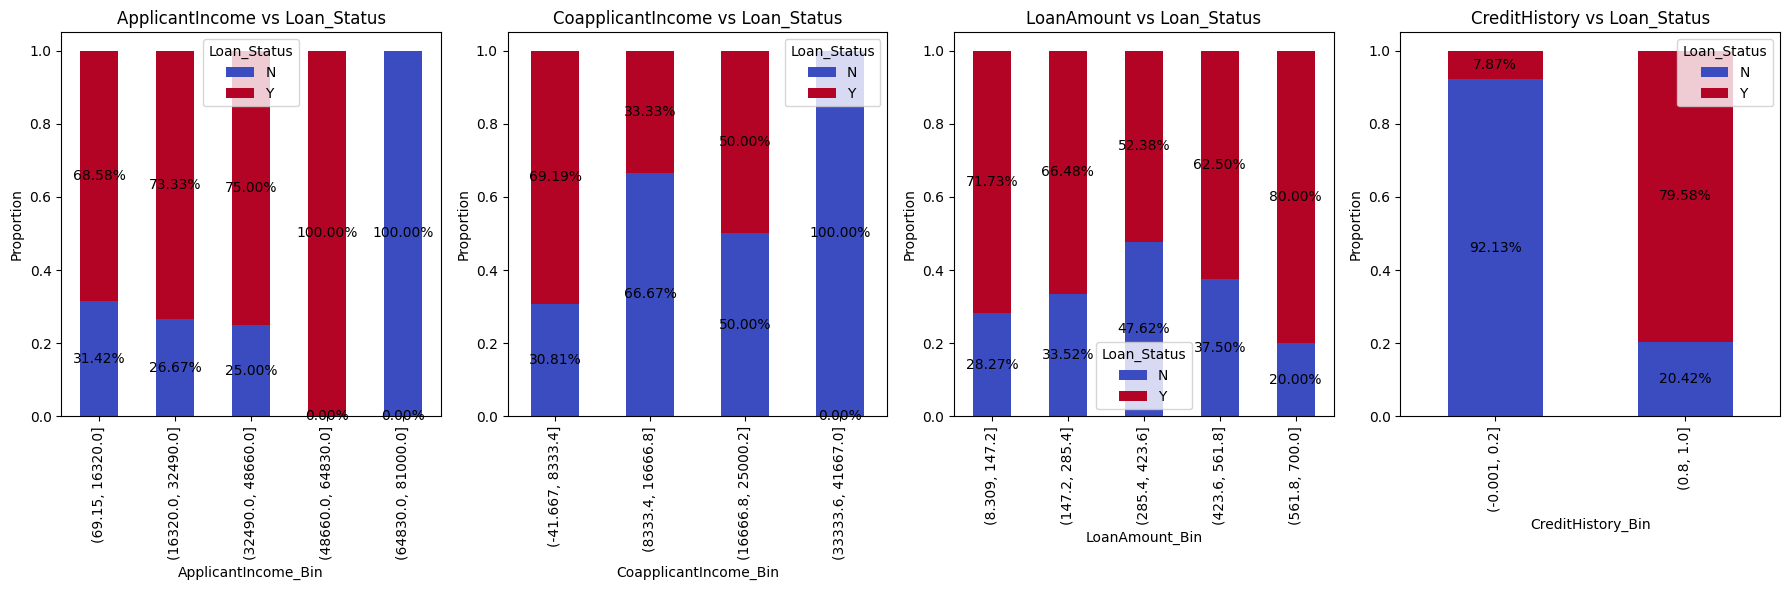

In [31]:
# Specify the numerical columns to display
numerical_columns_to_display = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']
target_column = 'Loan_Status'

# Bin the numerical variables
train_data_clean['ApplicantIncome_Bin'] = pd.cut(train_data_clean['ApplicantIncome'], bins=5)
train_data_clean['CoapplicantIncome_Bin'] = pd.cut(train_data_clean['CoapplicantIncome'], bins=5)
train_data_clean['LoanAmount_Bin'] = pd.cut(train_data_clean['LoanAmount'], bins=5)
train_data_clean['CreditHistory_Bin'] = pd.cut(train_data_clean['Credit_History'], bins=5)


# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each binned column in a separate subplot
for i, col in enumerate(['ApplicantIncome_Bin', 'CoapplicantIncome_Bin', 'LoanAmount_Bin', 'CreditHistory_Bin']):
    # Create a crosstab of the column and the target variable
    crosstab = pd.crosstab(train_data_clean[col], train_data_clean[target_column], normalize='index')

    # Plot stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f"{col.replace('_Bin', '')} vs {target_column}")
    axes[i].set_ylabel('Proportion')

    # Add percentage values inside each bar
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2%}', (x + width/2., y + height/2.), ha='center', va='center')

# Adjust layout
plt.tight_layout()
plt.show()

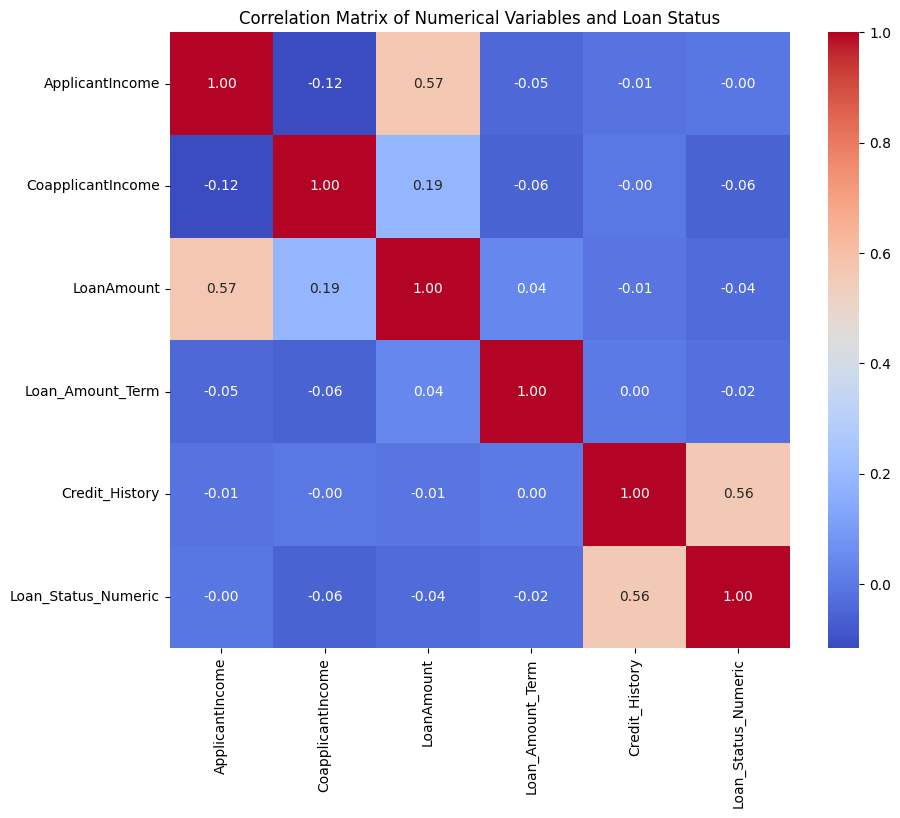

In [36]:
# Convert the categorical target variable to numerical
train_data_clean['Loan_Status_Numeric'] = train_data_clean['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Specify the columns to include in the correlation matrix
columns_to_include = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status_Numeric']

# Compute the correlation matrix
correlation_matrix = train_data_clean[columns_to_include].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
plt.title('Correlation Matrix of Numerical Variables and Loan Status')
plt.show()


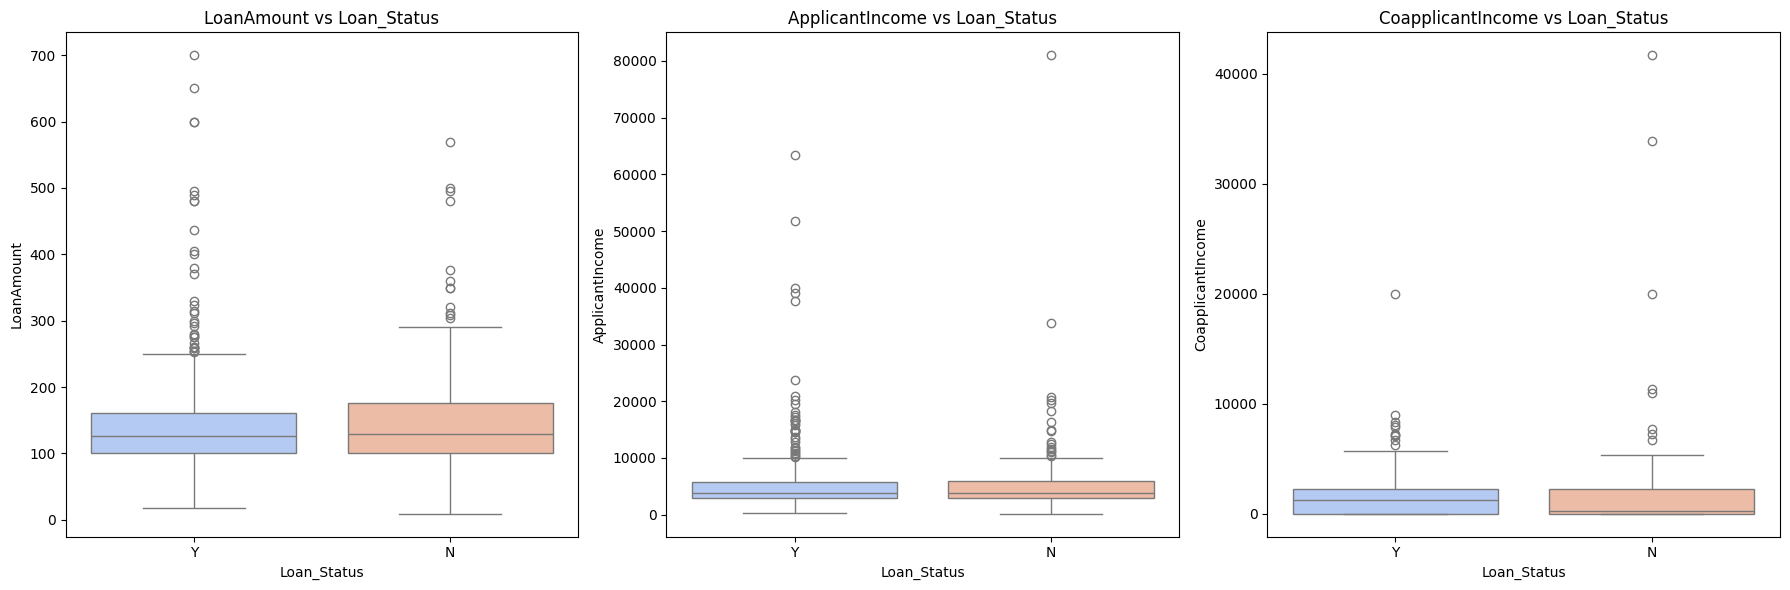

In [28]:
# Specify the numerical columns to display
numerical_columns_to_display = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
target_column = 'Loan_Status'

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(numerical_columns_to_display):
    sns.boxplot(x=target_column, y=col, data=train_data_clean, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f"{col} vs {target_column}")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel(target_column)

# Adjust layout
plt.tight_layout()
plt.show()